# Regressão - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [160]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

%matplotlib inline

In [133]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

# 1 Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill.

In [134]:
# 1 - criando formula para o modelo sendo o log de tip explicado por outras variáveis
#Obs: a coluna correta parece ser time e não diner.

formula = 'np.log(tip) ~ sex + smoker + time + net_bill' 

# Usando Patsy para criar a matriz de design e resposta
y, X = patsy.dmatrices(formula, data=tips)

In [135]:
# Utilizando o statsmodels.api as sm importado anteriormente
# Treinando o modelo de Regressão Linear com a instância OLS do statsmodels
modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           1.21e-18
Time:                        16:12:54   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.

Com o modelo de Regressão acima e incluindo todas as variáveis obtivemos um R-quadrado de 0.313, o que significa que 31.3% do log das gorjetas (ou as gorjetas em si) que podem ser explicadas pelas demais variáveis.


Observações quando aos p-valores do nosso modelo:

Intercept: p-valor < 0.05, o que indica que é estatisticamente significativo (que corresponde a uma confiança de 95% ou mais).

*sex: p-valor = 0.923, o que indica que não é estatisticamente significativo (com base em um nível de significância de 0.05).

*smoker: p-valor = 0.367, também indica que não é estatisticamente significativo.

*time p-valor = 0.723, que também não é estatisticamente significativo.

net_bill: p-valor < 0.05, que indica que é estatisticamente significativo.

Com base nas observações acima, concluímos que apenas a coluna 'net_bill' é estatisticamente significativa.

# 2 Remova as variáveis não significantes

Para este exercício, basta criarmos um outro modelo contendo apenas a variável estatisticamente significante. Desta forma, nosso modelo se torna uma Regressão Linear Simples (apenas uma variável independente), em contraste com o modelo anterior.

In [136]:
#np.log(tip) explicado por net_bill
nova_formula = 'np.log(tip) ~ net_bill'

#Criando a matriz de design e resposta
y, X = patsy.dmatrices(nova_formula, data=tips)

#Treinando o modelo
novo_modelo = sm.OLS(y, X).fit()

print(novo_modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           2.60e-21
Time:                        16:12:55   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

Com o nosso novo modelo (apenas uma variável independente) obtivemos um R-quadrado um pouco inferior ao anterior: 0.311 ou 31.1% 

# 3 - observe o gráfico de resíduos em função de net_bill

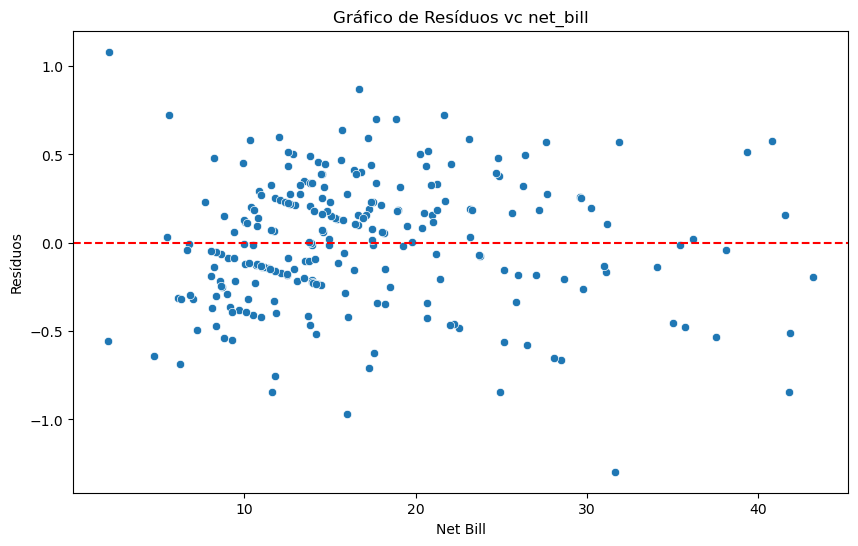

In [137]:
residuos = novo_modelo.resid

plt.figure(figsize =(10, 6))
sns.scatterplot(x=tips['net_bill'], y=residuos)
plt.axhline(y=0, color='red', linestyle='--') # Desenha uma linha horizontal em y=0
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vc net_bill')

plt.show()

Interpretação do Gráfico de Resíduos:

Eixo X - Net Bill:
Este é o eixo horizontal, e ele mostra os valores da conta líquida (net_bill) dos clientes. Quanto cada cada cliente pagou pela refeição, sem contar a gorjeta.

Eixo y:
os redísuos estão plotados em relação ao eixo y, isso mostra o quanto o modelo errou nas previsões. Quando um ponto está acima da linha vermelha horizontal, significa que o modelo previu menos do que a gorjeta real (subestimação). Quando um ponto está abaixo da linha, o modelo previu mais do que a gorjeta real (superestimação).

Linha Vermelha Horizontal:
Esta linha representa um resíduo de zero. Idealmente, queremos que os pontos (resíduos) estejam espalhados aleatoriamente em torno desta linha, sem formar nenhum padrão claro.

Distribuição dos Resíduos:
*Sem Padrão: Se os resíduos parecem estar dispersos aleatoriamente em torno da linha horizontal, isso sugere que o modelo é apropriado.
*Com Padrão: Se observarmos padrões, como forma de funil (indicando heteroscedasticidade) ou uma curva (indicando não-linearidade), o modelo pode precisar ser melhorado.

Conclusão:
Há uma ligeira abertura em forma de funil onde os resíduos se tornam mais dispersos à medida que o valor de net_bill aumenta, o que pode sugerir heteroscedasticidade. Isso significa que o modelo pode ser mais preciso para valores menores de net_bill e menos preciso para valores maiores.

Sugestão para melhora do modelo:
Embora possamos utilizar várias técnicas para melhorar o nosso modelo, e tendo em vista que já utilizamos uma transformação logarítmica na variável dependente - np.log(tip) - , abaixo, testaremos uma transformação log na variável net_bill e um polinômio.

# 4 teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

In [138]:
# Trabsformando net_bill no log
tips['log_net_bill'] = np.log(tips['net_bill'])
formula_log = 'np.log(tip) ~ log_net_bill'
y_log, X_log = patsy.dmatrices(formula_log, data=tips)
modelo_log = sm.OLS(y_log, X_log).fit()

In [139]:
# Criando termos polinomiais para net_bill
tips['net_bill_sqr'] = tips['net_bill'] ** 2 
formula_pol = 'np.log(tip) ~ net_bill + net_bill_sqr'
y_pol, X_pol = patsy.dmatrices(formula_pol, data=tips)
modelo_pol = sm.OLS(y_pol, X_pol).fit()

In [140]:
#Comparando os modelos
print('Modelo Logarítmico:')
print(modelo_log.summary())
print('\nModelo Polinomial:')
print(modelo_pol.summary())


Modelo Logarítmico:
                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           5.62e-22
Time:                        16:12:58   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942     

Modelo Logarítmico (net_bill transformado em logaritmo): R-quadrado = 0.319
Modelo Polinomial (net_bill e net_bill ao quadrado): R-quadrado = 0.338

Conclusões finais: modelo polinomial parece ser melhor porque tem um R-quadrado mais alto, o que indica que ele captura mais da variabilidade dos dados. A inclusão do termo ao quadrado na variável net_bill permite que o modelo ajuste curvaturas potenciais na relação entre net_bill e a gorjeta, o que pode ser uma característica real dos dados que um modelo linear simples ou um modelo log-linear não captura. Em outras palavras, a relação entre a conta líquida e a gorjeta pode não ser estritamente linear ou log-linear, mas sim polinomial, onde a taxa de aumento (ou diminuição) da gorjeta muda à medida que a conta líquida aumenta. 

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [141]:
data = pd.read_csv('previsao_de_renda.csv.csv')

In [142]:
data.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056.0,F,False,True,0.0,Empresário,Secundário,Solteiro,Casa,26.0,6.602740,1.0,8060.34
1,1,2015-01-01,9968.0,M,True,True,0.0,Assalariado,Superior completo,Casado,Casa,28.0,7.183562,2.0,1852.15
2,2,2015-01-01,4312.0,F,True,True,0.0,Empresário,Superior completo,Casado,Casa,35.0,0.838356,2.0,2253.89
3,3,2015-01-01,10639.0,F,False,True,1.0,Servidor público,Superior completo,Casado,Casa,30.0,4.846575,3.0,6600.77
4,4,2015-01-01,7064.0,M,True,False,0.0,Assalariado,Secundário,Solteiro,Governamental,33.0,4.293151,1.0,6475.97


1 - Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

In [143]:
data.shape

(11689, 15)

In [144]:
#Verificando valores ausentes
data.isnull().sum()

Unnamed: 0                  0
data_ref                    0
id_cliente                  1
sexo                        1
posse_de_veiculo            1
posse_de_imovel             1
qtd_filhos                  1
tipo_renda                  1
educacao                    1
estado_civil                1
tipo_residencia             1
idade                       1
tempo_emprego            1985
qt_pessoas_residencia       1
renda                       1
dtype: int64

Após a verificação dos valores ausentes, notamos que em nossas variáveis de interesse possuímos 1985 valores ausentes em 'tempo_emprego' e 1 valor ausente em 'renda'.

Poderíamos aplicar varias abordagens, porém, optamos por utilizar a mediana para ambos os casos. A exclusão dos valores ausentes em tempo_emprego por exemplo, afetaria diretamente nosso modelo, seja devido a uma quantidade substancial de dados excluídos, seja também porque necessariamente teríamos que excluir valor presentes na coluna renda com o intuíto de equilibrar o nosso dataframe. 

In [145]:
#imputação de mediana dos valores ausentes em renda
mediana_renda = data['renda'].median()

data['renda'] = data['renda'].fillna(mediana_renda)

In [146]:
#imputação de mediana dos valores ausentes em tempo_emprego
mediana_tempo_emprego = data['tempo_emprego'].median()

data['tempo_emprego'] = data['tempo_emprego'].fillna(mediana_tempo_emprego)


In [147]:
data.isnull().sum()

Unnamed: 0               0
data_ref                 0
id_cliente               1
sexo                     1
posse_de_veiculo         1
posse_de_imovel          1
qtd_filhos               1
tipo_renda               1
educacao                 1
estado_civil             1
tipo_residencia          1
idade                    1
tempo_emprego            0
qt_pessoas_residencia    1
renda                    0
dtype: int64

Como podemos notar, após o tratamento dos dados ausentes com a mediana, agora temos zero valores nulos para as nossas colunas de interesse.

In [148]:
# Explicar renda como variável resposta, por tempo_emprego como variável explicativa

formula = 'renda ~ tempo_emprego'

y, X = patsy.dmatrices(formula, data=data)

modelo_simples = sm.OLS(y, X).fit()

print(modelo_simples.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     2058.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:13:02   Log-Likelihood:            -1.2129e+05
No. Observations:               11689   AIC:                         2.426e+05
Df Residuals:                   11687   BIC:                         2.426e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1788.2336    112.512     15.894

Como resultado do modelo de regressão linear simples acima, obtivemos um R-quadrado de 0.150. Este valor sugere que cerca de 15% da variabilidade na renda pode ser explicada pelo tempo_emprego. Em outras palavras, o tempo_emprego como variável única fornece uma explicação limitada para a variação na renda dos indivíduos.

2 Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

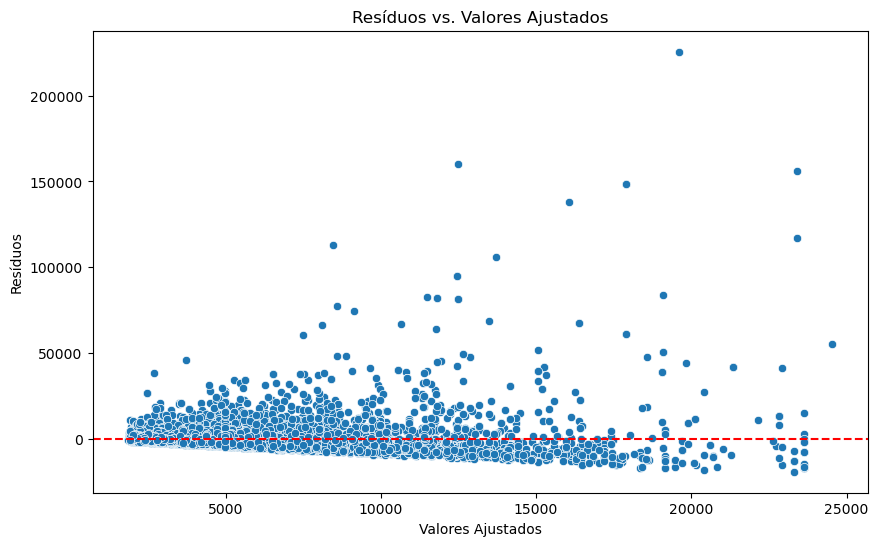

In [149]:
#pltando um gráfico de resíduos

residuos = modelo_simples.resid

# Plotando resíduos vs. valores ajustados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=modelo_simples.fittedvalues, y=residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Ajustados')
plt.show()

Conforme o gráfico de resíduos acima nos apresenta, o modelo de regressão linear simples (com apenas duas variáveis) não performou bem: R quadrado = 0.150. A grande quantidade de resíduos acima do ponto 0 no eixo x sugere que a regressão previu um valor menor do que o valor real observado da variável dependente, neste caso, a renda. Em outras palavras, os resíduos positivos indicam subestimação pelo modelo.

Embora poderíamos utilizar outras técnicas em nosso modelo como transformação logarítmica ou polinomial, parece improvável que possamos obter um resultado aceitável dado que o nosso R-quadrado foi muito baixo.

Como nosso dataset possui uma quantidade substancial de outras variáveis, tentaremos agora utilizá-las e, em seguida, compararemos os resultados.

3 - Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.

Conforme observamos anteriormente, em nosso dataframe possuímos valores nulos que a princípio não precisaríamos tratá-los, agora para que possamos utilizar todas as variáveis o tratamento destes dados se faz necessário 

In [150]:
data.isnull().sum()

Unnamed: 0               0
data_ref                 0
id_cliente               1
sexo                     1
posse_de_veiculo         1
posse_de_imovel          1
qtd_filhos               1
tipo_renda               1
educacao                 1
estado_civil             1
tipo_residencia          1
idade                    1
tempo_emprego            0
qt_pessoas_residencia    1
renda                    0
dtype: int64

Observamos que, dada a sua natureza, a variável id_cliente e unnamed não são significativas, nosso primeiro passo portanto será excluí-la de nosso DataFrame


In [152]:
data = data.drop('id_cliente', axis=1)
data = data.drop('Unnamed: 0', axis=1)


In [153]:
data.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,0.0,Empresário,Secundário,Solteiro,Casa,26.0,6.602740,1.0,8060.34
1,2015-01-01,M,True,True,0.0,Assalariado,Superior completo,Casado,Casa,28.0,7.183562,2.0,1852.15
2,2015-01-01,F,True,True,0.0,Empresário,Superior completo,Casado,Casa,35.0,0.838356,2.0,2253.89
3,2015-01-01,F,False,True,1.0,Servidor público,Superior completo,Casado,Casa,30.0,4.846575,3.0,6600.77
4,2015-01-01,M,True,False,0.0,Assalariado,Secundário,Solteiro,Governamental,33.0,4.293151,1.0,6475.97


In [155]:
print(data['data_ref'].dtype)


object


Percebemos que a coluna 'data_ref' está no formato object. Inicialmente ela parece ser irrelevante, porém, pretendemos analisar isso com mais cuidado mais à frente. Por hora a transformaremos no formato no formato datetime para que nosso modelo performe melhor.

In [158]:
data['data_ref'] = pd.to_datetime(data['data_ref'])

In [162]:
#Confirmando a transformação da coluna data_ref para datetime'
print(data['data_ref'].dtype)

datetime64[ns]


In [163]:
#Checando novamente valores nulos
data.isnull().sum()

data_ref                 0
sexo                     1
posse_de_veiculo         1
posse_de_imovel          1
qtd_filhos               1
tipo_renda               1
educacao                 1
estado_civil             1
tipo_residencia          1
idade                    1
tempo_emprego            0
qt_pessoas_residencia    1
renda                    0
dtype: int64

Agora que excluímos variáveis visivelmente insignificantes, vamos lidar com os demais valores nulos em nosso DataFrame. 
Poderíamos usar técnicas de imputação de dados como moda para variáveis categóricas e media ou mediana para variáveis numéricas. Porém, como os valores nulos estão presentes em apenas uma linha das nossas colunas, optaremos por utilizar o método drop.na() que excluirá cada linha com valores nulos e afetará todas as demais colunas, porém, não deve afetar o resultado dos nossos futuros modelos.

In [170]:
#Checando novamente os valores nulos
data.isnull().sum()

data_ref                 0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [171]:
#Verificando se o número de linhas é equivalente em todas as colunas
data_count = data.count()
print(data_count)



data_ref                 11688
sexo                     11688
posse_de_veiculo         11688
posse_de_imovel          11688
qtd_filhos               11688
tipo_renda               11688
educacao                 11688
estado_civil             11688
tipo_residencia          11688
idade                    11688
tempo_emprego            11688
qt_pessoas_residencia    11688
renda                    11688
dtype: int64


Conforme podemos observar acima, removemos as colunas visivelmente não significativas, excluímos as linhas com dados ausentes, obtivemos um DataFrame sem dados nulos e notamos que todas as colunas resultantes possuem a mesma quantidade de dados.

Nosso próximo passo é criar um modelo de Regressão Linear Múltipla, neste caso, utilizaremos todas as colunas disponíveis e comparaemos com o modelo anterior (simples)

Devemos lembrar que possuímos variáveis de vários formatos em nosso DF, porém o Patsy deve transformá-las em dummy automaticamente

In [176]:
#formula com renda sendo explicada por todas as variáveis
formula = 'renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + data_ref'

#Criando a matriz de design
y, X = patsy.dmatrices(formula, data=data)

#Criando o modelo
modelo = sm.OLS(y, X).fit()

#imprimindo os resultados
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     116.9
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:01:52   Log-Likelihood:            -1.2047e+05
No. Observations:               11688   AIC:                         2.410e+05
Df Residuals:                   11652   BIC:                         2.413e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

Conforme podemos observar acima, ao utilizar todas as variáveis disponíveis, obtivemos uma melhora significativa em nosso R-quadrado: 0.260 (em comparação com a Regressão Linear Simples que obteve um R-quadrado de  0.150) . Isso significa que 26% da nossa variável 'renda' pode ser explicada através da modelagem com todas as variáveis disponíveis.

4 - Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros.

Obs: Como possuímos uma grande quantidade de variáveis em nosso modelo e verificar visualmente pode não ser eficiente, utilizaremos um loop for filtrando os p-values com a expressão < 0.05. Utilizaremos a marcação: '----' após a f-string para identidicar com mais facilidade os valores significativos.

In [181]:

p_values = modelo.pvalues #atribuindo os p values à variável p_values

# Este loop itera sobre todas as variáveis independentes (exógenas) do modelo.
# modelo.model.exog_names: Lista dos nomes das variáveis independentes no modelo.
#len() # Calcula quantas variáveis independentes existem.
# range() Cria uma sequência de números começando de 0 até o número de variáveis independentes (excluindo o último número)
for i in range(len(modelo.model.exog_names)):
    
#nome_variavel = modelo.model.exog_names[i]: Para cada iteração do loop, esta linha obtém o nome da i-ésima variável independente.
    nome_variavel = modelo.model.exog_names[i]
#p_valor = p_values[i]: Esta linha obtém o valor p correspondente a essa variável. O índice i garante que você está pegando o valor p da variável correta.
    p_valor = p_values[i]

#Condicionais booleanas para a filtragem dos valores
    if p_valor < 0.05:
        print(f"---- {nome_variavel} é estatisticamente significativo (valor p = {p_valor:.4f})") 
    else:
        print(f"{nome_variavel} não é estatisticamente significativo (valor p = {p_valor:.4f})")
        
#OBS> quando nos referimos à "i-ésima variável", estamos falando sobre a variável que está na posição marcada pelo valor atual de i.


Intercept não é estatisticamente significativo (valor p = 0.2541)
---- sexo[T.M] é estatisticamente significativo (valor p = 0.0000)
posse_de_veiculo[T.True] não é estatisticamente significativo (valor p = 0.9407)
---- posse_de_imovel[T.True] é estatisticamente significativo (valor p = 0.0054)
tipo_renda[T.Bolsista] não é estatisticamente significativo (valor p = 0.4512)
---- tipo_renda[T.Empresário] é estatisticamente significativo (valor p = 0.0000)
---- tipo_renda[T.Pensionista] é estatisticamente significativo (valor p = 0.0100)
tipo_renda[T.Servidor público] não é estatisticamente significativo (valor p = 0.3617)
educacao[T.Pós graduação] não é estatisticamente significativo (valor p = 0.6667)
educacao[T.Secundário] não é estatisticamente significativo (valor p = 0.9305)
educacao[T.Superior completo] não é estatisticamente significativo (valor p = 0.2380)
educacao[T.Superior incompleto] não é estatisticamente significativo (valor p = 0.8121)
estado_civil[T.Separado] não é estatist

Após o código acima e seu respectivo resultado, podemos concluir que as variáveis estatisticamente significativas (identificadas com ----) são: sexo, posse_de_imovel, tipo_renda, idade e tempo_emprego.

Agora com base nas variáveis mais estatisticamente significativas, criaremos um outro modelo de Regressão Linear Múltipla e compararemos os resultados:

In [182]:
#Formula com as variáveis estatisticamente significativas
formula = 'renda ~ sexo + posse_de_imovel + tipo_renda + idade + tempo_emprego'

y, X = patsy.dmatrices(formula, data=data)

modelo_novo = sm.OLS(y, X).fit()

print(modelo_novo.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     504.8
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:06:39   Log-Likelihood:            -1.2049e+05
No. Observations:               11688   AIC:                         2.410e+05
Df Residuals:                   11679   BIC:                         2.411e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Ao observarmos o R squared acima: 0.257 obtivemos um resultado curioso: após selecionar as variáveis estatisticamente significativas obtivemos um resultado um pouco inferior quando comparado com o nosso modelo anterior que continha todas as variáveis: R squared 0.260. 

Por outro lado, devemos nos atentar que um modelo mais simples, com menos variáveis, mas com um R-quadrado ligeiramente menor, pode ser preferível se as variáveis removidas não forem estatisticamente significativas. Isso é conhecido como o princípio da parcimônia ou simplicidade. Um modelo mais simples geralmente é mais fácil de interpretar e menos propenso a sobreajuste (overfitting)

5 - Faça uma análise de resíduos. Avalie a qualidade do ajuste.

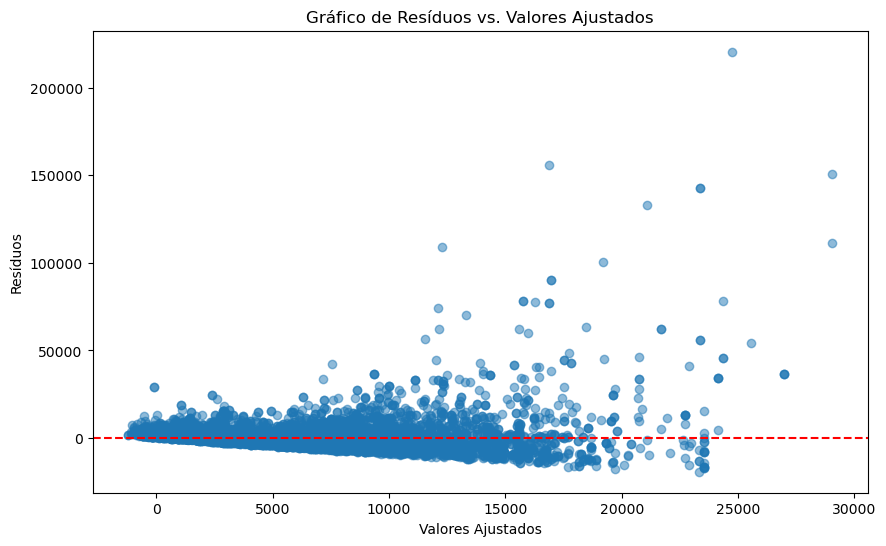

In [185]:
valores_ajustados = modelo_novo.fittedvalues

residuos = modelo_novo.resid

# Plotando o gráfico de resíduos
plt.figure(figsize=(10, 6))
plt.scatter(valores_ajustados, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Valores Ajustados')
plt.show()

Conclusão: O gráfico de resíduos versus valores ajustados sugere a presença de heterocedasticidade, já que a variância dos resíduos parece aumentar com os valores ajustados. Também há indicações de possíveis outliers, dada a presença de resíduos com valores muito altos. Essas observações podem apontar para a necessidade de revisar o modelo, possivelmente incluindo mais variáveis explicativas, realizando transformações de variáveis ou tratando os outliers para melhorar o ajuste do modelo aos dados.